<a href="https://colab.research.google.com/github/Seyi-Peter/Handwriting-Recog-using-mnist/blob/main/CNN_Model_using_Mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import tensorflow as tf              # Deep learning framework
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt      # For plotting images
import numpy as np                   # For number operations


In [3]:
# Load MNIST dataset directly from TensorFlow
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


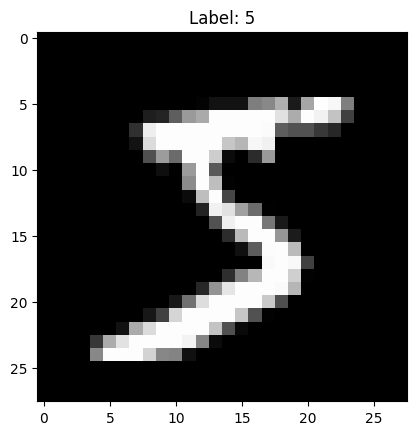

In [4]:
# Check the shape of the dataset
print("Training images shape:", x_train.shape)
print("Test images shape:", x_test.shape)

# Show a sample image
plt.imshow(x_train[0], cmap='gray')   # show the first image in grayscale
plt.title(f"Label: {y_train[0]}")
plt.show()


In [5]:
# Normalize pixel values (0–255) to range (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add "channel" dimension (for CNN)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [7]:
# Create a CNN (Convolutional Neural Network)
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)), # Use Input layer to specify input shape
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
# Compile model
model.compile(
    optimizer='adam',                             # optimizer for learning
    loss='sparse_categorical_crossentropy',       # good for integer labels
    metrics=['accuracy']                          # track accuracy while training
)

# Train the model for 5 epochs
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)              # monitor test data while training
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9035 - loss: 0.3129 - val_accuracy: 0.9821 - val_loss: 0.0511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9852 - loss: 0.0485 - val_accuracy: 0.9856 - val_loss: 0.0448
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9903 - val_loss: 0.0290
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9902 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9916 - val_loss: 0.0261


In [9]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.4f}")


313/313 - 2s - 8ms/step - accuracy: 0.9916 - loss: 0.0261

✅ Test accuracy: 0.9916


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


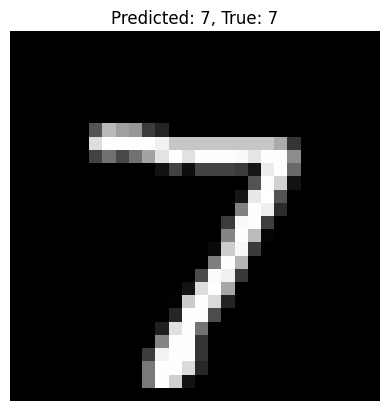

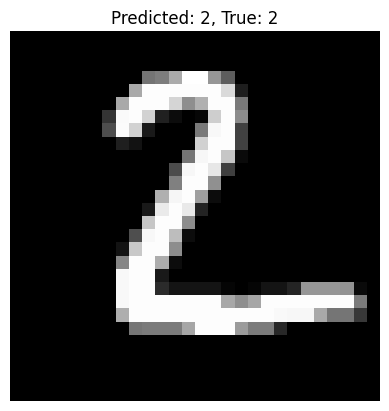

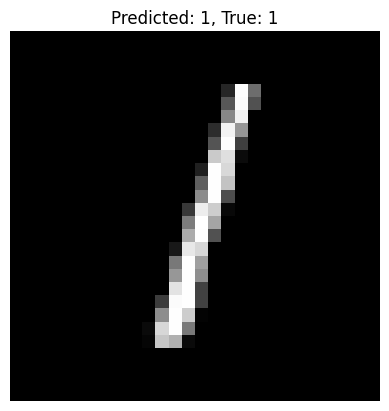

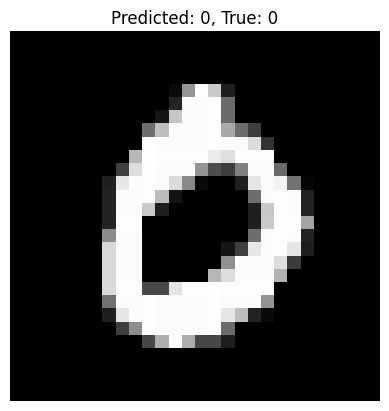

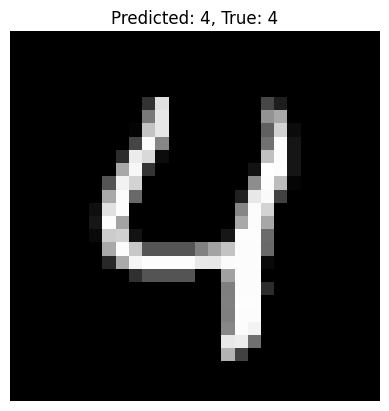

In [12]:
# Predict on first 5 test images
predictions = model.predict(x_test[:5])

# Show results
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis("off")
    plt.show()


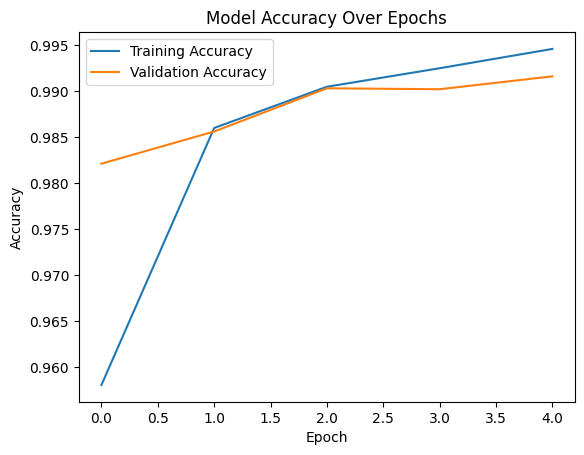

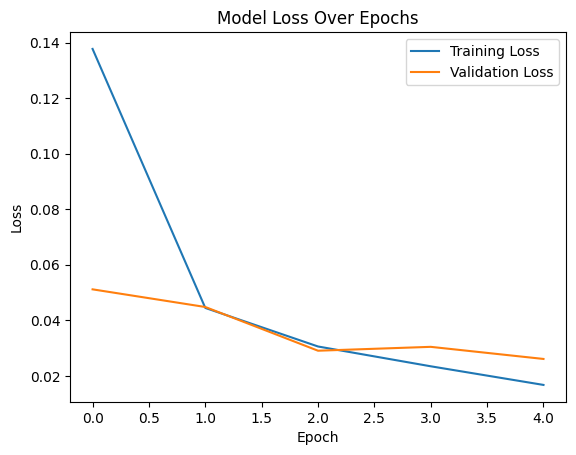

In [13]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
